# 1. One Sameple T-test, 单样本t检验
- 取一个样本均值和整体样本均值做比较

In [7]:
# create data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
score = np.random.normal(80, 3, 500).astype(int)
score_class = np.random.choice(score, 20)

1.1 单样本双边t检验

In [22]:
# null hypo， H0：u = u0， 班级均分和全校均分无显著差别
df = 19
class_mean = score_class.mean()  # 抽样平均分
class_std = np.std(score_class)  # 抽样标准差s
school_mean = score.mean()  # 全校平均分u
alpha = 0.05
print('班级均值: ', class_mean, ', 全校均值: ', school_mean)

t_critical = t.ppf(q=1-alpha/2,df=df)  # 双边检验下的t界值
t_val = (class_mean - school_mean) / (class_std / np.sqrt(20))  # 根据抽取样本计算出的t值
scope = t_critical * class_std / np.sqrt(20)
confidence_interval = (class_mean-scope, class_mean+scope)  # 班级样本计算出的置信区间
print('抽样t值: ', t_val, ', 双边t界值: ', t_critical)
print('班级置信区间: ', confidence_interval)

# 判断方法1， 通过样本均值和t临界值进行比较：
t_accept_area = [-1*t_critical, t_critical]  # t临界值接受域范围
if t_val>t_accept_area[0] and t_val<t_accept_area[1]:
    print('\n结论：样本计算出的t没有落在拒绝域，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别')
else:
    print('\n结论：样本计算出的t落在拒绝域，在双边a=0.05的显著水平下，拒绝H0，接受H1，班级均分和全校均分有显著差别')

# 判断方法2， 根据P值和显著水平a比较， p>alpha接受，p<alpha拒绝
p_value = t.sf(abs(t_val), df=df)*2  # 根据正负样本t值，左右p相加得到
print('\nP值：', p_value)
if p_value > alpha:
    print('结论：p值大于显著水平，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别')
else:
    print('结论：p值小于显著水平，在双边a=0.05的显著水平下，拒绝H0，接受H1，班级均分和全校均分有显著差别')

# 判断方法3：抽样建立的置信区间是否包含u0
if school_mean > confidence_interval[0] and school_mean < confidence_interval[1]:
    print('\n结论：u0在样本置信区间内，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别')
else:
    print('\n结论：u0不在样本置信区间内，在双边a=0.05的显著水平下，拒绝H0，接受H1，班级均分和全校均分有显著差别')

班级均值:  79.25 , 全校均值:  79.452
抽样t值:  -0.37879624259830097 , 双边t界值:  2.093024054408263
班级置信区间:  (78.13385677722042, 80.36614322277958)

结论：样本计算出的t没有落在拒绝域，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别

P值： 0.7090388872919886
结论：p值大于显著水平，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别

结论：u0在样本置信区间内，在双边a=0.05的显著水平下，无法拒绝H0，班级均分和全校均分无显著差别


1.2 单样本单边右尾t检验

In [27]:
# null hypo， H0：u < u0， 班级均分是否显著低于全校均分
t_critical_right_tailed = t.ppf(q=1-alpha,df=df)  # 右尾下的t界值
print('抽样t值: ', t_val, '右尾t界值：', t_critical_right_tailed)

# 判断方法1， 通过样本均值和t临界值进行比较：
if t_val < t_critical_right_tailed:
    print('\n结论：样本计算出的t没有落在拒绝域，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著低于全校均分')
else:
    print('\n结论：样本计算出的t落在拒绝域，在单边a=0.05的显著水平下，拒绝H0，接受H1，班级均分显著高于全校均分')

# 判断方法2， 根据P值和显著水平a比较， p>alpha接受，p<alpha拒绝
p_value = 1 - t.sf(abs(t_val), df=df)  #样本t值右侧面积
print('\nP值：', p_value)
if p_value > alpha:
    print('结论：p值大于显著水平，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著低于全校均分')
else:
    print('结论：p值小于显著水平，在单边a=0.05的显著水平下，拒绝H0，接受H1，班级均分显著高于全校均分')

抽样t值:  -0.37879624259830097 右尾t界值： 1.729132811521367

结论：样本计算出的t没有落在拒绝域，在双边a=0.05的显著水平下，无法拒绝H0，班级均分显著低于全校均分

P值： 0.6454805563540057
结论：p值大于显著水平，在双边a=0.05的显著水平下，无法拒绝H0，班级均分显著低于全校均分


1.3 单样本单边左尾t检验

In [31]:
# null hypo， H0：u > u0， 班级均分是否显著高于全校均分
t_critical_left_tailed = t.ppf(q=alpha,df=df)  # 左尾下的t界值
print('抽样t值: ', t_val, '左尾t界值：', t_critical_left_tailed)

# 判断方法1， 通过样本均值和t临界值进行比较：
if t_val > t_critical_left_tailed:
    print('\n结论：样本计算出的t没有落在拒绝域，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著高于全校均分')
else:
    print('\n结论：样本计算出的t落在拒绝域，在单变a=0.05的显著水平下，拒绝H0，接受H1，班级均分显著低于全校均分')

# 判断方法2， 根据P值和显著水平a比较， p>alpha接受，p<alpha拒绝
p_value = t.sf(abs(t_val), df=df)  #样本t值左边面积
print('\nP值：', p_value)
if p_value > alpha:
    print('结论：p值大于显著水平，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著高于全校均分')
else:
    print('结论：p值小于显著水平，在单边a=0.05的显著水平下，拒绝H0，接受H1，班级均分显著低于全校均分')

抽样t值:  -0.37879624259830097 左尾t界值： -1.7291328115213678

结论：样本计算出的t没有落在拒绝域，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著高于全校均分

P值： 0.3545194436459943
结论：p值大于显著水平，在单边a=0.05的显著水平下，无法拒绝H0，班级均分显著高于全校均分


# 2. 样本正态性
- n = 30。样本容量大于等于30时，算作大样本了。就算整体分布不为正态分布，在n>30时，t值抽样分布就和实际的t分布一致了
- 实验表明,样本容量大于30时,t分布已不再要求样本的正态性,可以直接进行t检验。这个就叫做大样本容量时,t检验对于非正态性总体的"鲁棒性"
- 如何检验样本正态性：1）画直方图， 2）画Q-Q图（quantile-quantile plot）, 分点位-分点位的图。假如样本中所有点都落在直线附近，则符合正态性。3）Kolmogorov-Smirnov Test；Shapiro-Wilk Test；Anderson-Darling Test。通常样本正态性检验的原假设都是,H0:样本所来自的总体符合正态分布。所以,只要样本p值大于设定的显著水平,就可以认为样本符合正态性。若样本p值小于显著水平,则认为H:样本所来自的总体不符合正态分布。

In [32]:
from IPython.display import Image
Image(url="WechatIMG38.jpeg", width=300, height=300)

In [33]:
Image(url="WechatIMG39.png", width=300, height=300)

# 3. Two-sample T-test， 双样本t检验

### 从两个学校中随机抽取20个，学校A的抽样均值为70， 学校B的抽样均值为68
### 情况1：假设两个学校的成绩来自同一总体
### 双样本均值差值分布

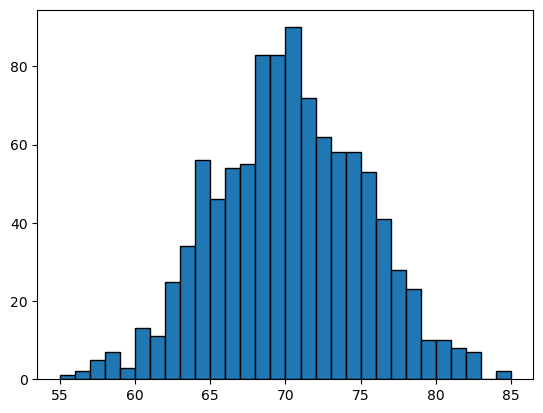

In [52]:
# null hypo, H0:假设两个样本来自同一总体 --> H0: u = u0
source = np.random.normal(70, 5, 1000).round(0)  # 创建1000个成绩
plt.hist(source, edgecolor='black', bins=30)
plt.show()

p值： 0.2061


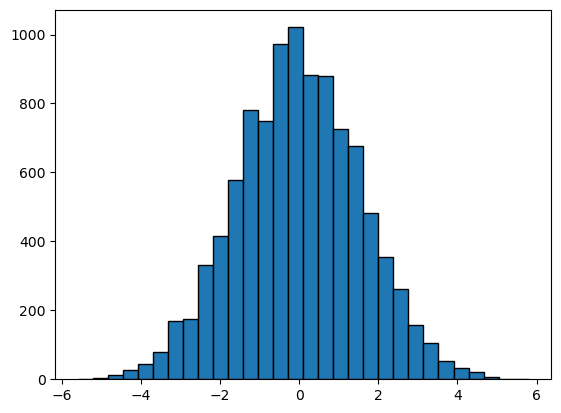

不拒绝H0, 说明正负2分的差值不极端，不显著， 不能说明两个学校的总体均分有显著差别


In [58]:
# 呈现均值差值分布
times = 10000
df = pd.DataFrame(columns=['mean_diff'])
for i in range(times):
    sample_A = np.random.choice(source, 20)
    sample_B = np.random.choice(source, 20)
    sample_A_mean = sample_A.mean()
    sample_B_mean = sample_B.mean()
    mean_diff = sample_A_mean-sample_B_mean
    df.loc[len(df)] = mean_diff

# 计算P值, 均值差值 <= -2  or 均值差值 >= -2 (抽到样本均值差值为正负2的p值)
p_val_10000 = len(df[(df.mean_diff <= -2) | (df.mean_diff >= 2)]) / 10000
print('p值：', p_val_10000)

plt.hist(df, edgecolor='black', bins=30)
plt.show()

# 验证
if p_val_10000 > alpha:
    print('不拒绝H0, 说明正负2分的差值不极端，不显著， 不能说明两个学校的总体均分有显著差别')
else:
    print('拒绝H0')

## 3.1 双样本t值抽样分布
- 标准误是带有单位的一个数值，用来和分子部分带有单位的均值差值，相互抵消单位
- 双样本t值抽样分布的自由度 = （n1-1）+(n2-1) = n1 + n2 - 2
- 单样本和双样本抽样形成的t分布,是同样的t分布。t临界值表里,并不区分单样本或双样本的t临界值表里,只区分双尾和单尾。

In [59]:
Image(url="WechatIMG40.jpeg", width=300, height=300)

### 对两个样本进行t值抽样，最终效果呈现t分布

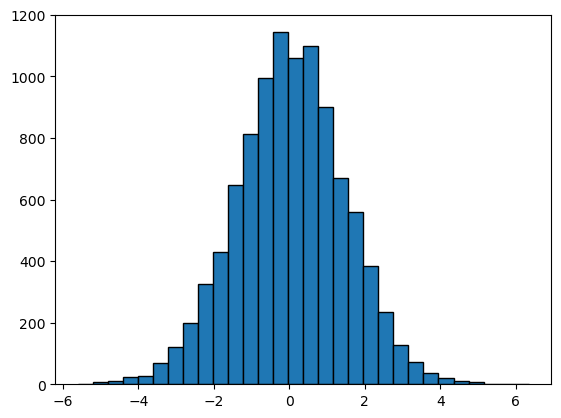

In [63]:
def two_sample_standard_error(s1, s2, n1, n2):
    se = np.sqrt(
        (((n1-1) * s1**2 + (n2-1) * s2**2)/(n1+n2-2))/n1 + (((n1-1) * s1**2 + (n2-1) * s2**2)/(n1+n2-2))/n2
    )
    return se

def two_sample_t_test(mean1, mean2, s1, s2, n1, n2):
    t_val_two_sample = (mean1 - mean2)/two_sample_standard_error(s1, s2, n1, n2)
    return t_val_two_sample

df_two_sample_t = pd.DataFrame(columns=['two_sample_t_val'])

for i in range(times):
    sample_A = np.random.choice(source, 20)
    sample_B = np.random.choice(source, 20)
    sample_A_mean = sample_A.mean()
    sample_B_mean = sample_B.mean()
    sample_A_std = np.std(sample_A)
    sample_B_std = np.std(sample_B)
    df_two_sample_t.loc[len(df_two_sample_t)] = two_sample_t_test(sample_A_mean,sample_B_mean,sample_A_std,sample_B_std,n1=38,n2=38)
plt.hist(df_two_sample_t, edgecolor='black', bins=30)
plt.show()

# 小节
- 单样本t检验：单样本 是否来自 已知总体. H0: u = u0
- 双样本t检验：两个样本 是否来自 同一个总体。 H0 : u1 = u2

## 3.2 独立样本t检验